In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
import os

import numpy as np
# %%
sys.path.append("../../")
import logging
from microfit.analysis import MultibandAnalysis
from microfit.fileio import from_json, to_json
from microfit.parameters import Parameter, ParameterSet

from data_loading import load_runs

In [22]:
RUN = ["1", "2", "3_nocrt", "3_crt", "4b", "4c", "4d", "5"]

signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=False,
    use_new_signal_model=True,
)

Loading run 1
Loading run 2
Loading run 3_nocrt
Loading run 3_crt
Loading run 4b
Loading run 4c
Loading run 4d
Loading run 5


In [23]:
from microfit.histogram import Binning, MultiChannelBinning
from microfit import histogram as hist
from microfit import detsys

In [24]:
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

binning_npl = Binning.from_config(*binning_def)
binning_npl.set_selection(preselection="NP", selection="NPBDT")
binning_npl.label = "NPBDT"

binning_npl = Binning.from_config(*binning_def)
binning_npl.set_selection(preselection="OneP", selection="OnePL")
binning_npl.label = "OnePL"

binning_zpl = Binning.from_config(*binning_def)
binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl.label = "ZPBDT"

binning_zplcrt = Binning.from_config(*binning_def)
binning_zplcrt.set_selection(preselection="ZP", selection="ZPBDT_CRT")
binning_zplcrt.label = "ZPBDT_CRT"

# binning_def = {
#     "variable": "cos_shr_theta",
#     "bin_edges": [-1.0, -0.5,  0.0,  0.25,  0.375,  0.5,  0.625, 0.75, 0.875, 1.0],
#     "variable_tex": r"Reconstructed $\cos(\theta)$",
# }

# binning_npl = Binning(**binning_def)
# binning_npl.set_selection(preselection="NP", selection="NPBDT")
# binning_npl.label = "NPBDT_COSTHETA"

# binning_zpl = Binning(**binning_def)
# binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
# binning_zpl.label = "ZPBDT_COSTHETA"

# binning_zplcrt = Binning(**binning_def)
# binning_zplcrt.set_selection(preselection="ZP", selection="ZPBDT_CRT")
# binning_zplcrt.label = "ZPBDT_CRT_COSTHETA"

signal_binning = MultiChannelBinning([binning_npl, binning_zpl, binning_zplcrt])

In [25]:
from microfit.parameters import Parameter, ParameterSet
from microfit.histogram import RunHistGenerator


signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
)

../../microfit/run_plotter.py:122: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


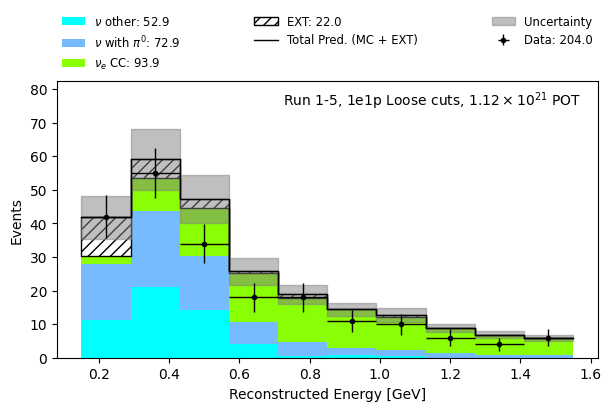

In [28]:
from microfit.run_plotter import RunHistPlotter
import matplotlib.pyplot as plt

ax, _ = RunHistPlotter(signal_generator).plot(
    category_column="paper_category",
    include_multisim_errors=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    add_precomputed_detsys=False,
    run_title="Run 1-5",
    channel="OnePL"
)
plt.savefig("post_unblinding_plots/onep_run1-5.pdf")